In [2]:
import numpy as np
import import_ipynb
import sinusfitnesfunction as ff
from IPython.display import clear_output


In [3]:
class Genetic_Algorithm():
    def __init__(
            self,                   n_genes,                n_alleles, 
            scale,                  offset,                 size_population, 
            generations,            pm,                     min_fitness_value=0, 
            show_output = True,     tournamentSize=0,       parentsSize = 2, 
            randomMutation = True):
        
        #obligatory
        self.n_genes = n_genes
        self.n_alleles = n_alleles
        self.scale = scale
        self.offset = offset
        self.total_alleles = self.n_genes * self.n_alleles
        self.size_population = size_population
        self.chromosomes = []
        self.fitness = []
        self.generations = generations
        self.pm = pm

        ##optionals
        self.min_fitness_value = min_fitness_value
        self.show_output = show_output
        self.tournamentSize = tournamentSize
        self.parentsSize = parentsSize
        self.randomMutation = randomMutation

    ##opciones para iniciar una población
    def init_population(self):
        self.chromosomes = np.array([[1 if np.random.rand() < 0.5 else 0 for j in range(self.total_alleles)] for i in range(self.size_population)])

        if self.n_genes == 1:
            self.fitness = np.array([ff.fitness_evaluation(self.chromosomes[i], self.n_genes, self.n_alleles, self.scale, self.offset) 
                        for i in range(self.size_population)])
        elif self.n_genes == 2: 
            self.fitness = np.array([ff.triangle_fitness(self.chromosomes[i], self.n_genes, self.n_alleles, self.scale, self.offset) 
                        for i in range(self.size_population)])
        elif self.n_genes == 6: 
            self.fitness = np.array([ff.Polinomial_fitness(self.chromosomes[i], self.n_genes, self.n_alleles, self.scale, self.offset) 
                        for i in range(self.size_population)])
        elif self.n_genes == 14:
            self.fitness = np.array([ff.fitnessFunctionGaussian(self.chromosomes[i], self.n_genes, self.n_alleles, self.scale, self.offset) 
                        for i in range(self.size_population)])
    
    def random_selection(self):
        parents_index = np.random.randint(0, self.size_population, 2)
        return parents_index
    

    ##opciones para escoger padres en un offspring
    def tournament(self):
        mate = []
        for i in range(self.parentsSize):
            parentIndex = []
            a = np.random.randint(0, self.size_population)
            for j in range(1, self.tournamentSize):
                parentIndex.append(np.random.randint(0 , (self.size_population -1) ))
            mate.append( min(parentIndex) )
        return mate
    
    def tournament_profe(self):
        matting_pool = []
        for i in range (2):
            a = np.random.randint(0, self.size_population)
            for j in range(1, self.tournamentSize):
                a = np.minimum(a, np.random.randint(0, self.size_population))
            matting_pool.append(a)
        return matting_pool

    def routlete_wheel_selection(self):
        i = 0
        prob_population =  1 / (1 + (self.fitness) - self.min_fitness_value)
        prob_population_sum = np.sum(prob_population)
        prob_ind_i = prob_population[i] / prob_population_sum
        sum = prob_ind_i
        r = np.random.rand()
        while sum <= r:
            i += 1
            prob_ind_i = prob_population[i] / prob_population_sum 
            sum += prob_ind_i
        return i
    

    #offspring
    def crossover(self, parent1, parent2):
        crossover_point = np.random.randint(0, self.total_alleles)
        offspring = []
        offspring.append(np.concatenate((parent1[0:crossover_point], parent2[crossover_point:])))
        offspring.append(np.concatenate((parent2[0:crossover_point], parent1[crossover_point:])))
        offspring = np.array(offspring)
        return offspring
    
    #opciones de mutaciones
    def uniform_mutation(self, chromosome):
        mutated_chromosome = [not (chromosome[i]) if np.random.rand() <= self.pm else chromosome[i] for i in range(self.total_alleles)]
        return np.array(mutated_chromosome)
    
    def inorder_mutation(self, chromosome):
        firstAllele = np.random.randint(0,self.n_alleles-1)
        secondAllele = np.random.randint(0,self.n_alleles-1)
        mutated_chromosome = chromosome.copy()
        if np.random.rand() <= self.pm:
            mutated_chromosome[firstAllele] = chromosome[secondAllele]
            mutated_chromosome[secondAllele] = chromosome[firstAllele]
        return np.array(mutated_chromosome)
    
    #ordenar población
    def sort_population(self):
        idx = np.argsort(self.fitness, axis=0).squeeze()
        self.chromosomes = self.chromosomes[idx]
        self.fitness = self.fitness[idx]

   
        
    
    
    #el mero mole
    def start(self):
        self.init_population()
        generation_counter = 0
        self.sort_population()
        array_best_fitness = [self.fitness[0][0]]
        array_worst_fitness = [self.fitness[-1][0]]
        while generation_counter <= self.generations:
            #Escogemos a los papases
            if self.tournamentSize > 0:
                 winnerParents = self.tournament()
                 id_parent1 = winnerParents[0]
                 id_parent2 = winnerParents[1]
            else:
                id_parent1 = self.routlete_wheel_selection()
                id_parent2 = self.routlete_wheel_selection()

            #Nace el neño
            offspring = self.crossover(self.chromosomes[id_parent1], self.chromosomes[id_parent2])

            #A lo mejor se deforma el niño
            if self.randomMutation:
                offspring_mutated = np.array([self.uniform_mutation(offspring[i]) for i in range(2)])
            else:
                offspring_mutated = np.array([self.inorder_mutation(offspring[i]) for i in range(2)])

            #vemos qué tan bueno salió el niño
            self.chromosomes = np.vstack((self.chromosomes, offspring_mutated))
            if self.n_genes == 1:
                offspring_fitness = np.array(([ff.fitness_evaluation(offspring_mutated[i], self.n_genes, self.n_alleles, self.scale, self.offset) for i in range (2)]))
                self.fitness = np.vstack((self.fitness, offspring_fitness))
            if self.n_genes == 2:
                offspring_fitness = np.array(([ff.triangle_fitness(offspring_mutated[i], self.n_genes, self.n_alleles, self.scale, self.offset) for i in range (2)]))
                self.fitness = np.vstack((self.fitness, offspring_fitness))
            if self.n_genes == 6:
                offspring_fitness = np.array(([ff.Polinomial_fitness(offspring_mutated[i], self.n_genes, self.n_alleles, self.scale, self.offset) for i in range (2)]))
                self.fitness = np.vstack((self.fitness, offspring_fitness))
            if self.n_genes == 14: 
                offspring_fitness = np.array(([ff.fitnessFunctionGaussian(offspring_mutated[i], self.n_genes, self.n_alleles, self.scale, self.offset) for i in range (2)]))
                self.fitness = np.vstack((self.fitness, offspring_fitness))
                
            #Ordenamos todo
            self.sort_population()
            self.chromosomes = self.chromosomes[0:self.size_population] #mataron mataron a un inocenteee
            self.fitness = self.fitness[0:self.size_population]

            #aumenta la generación
            generation_counter+=1

            #Pura estadística a partir de este punto
            best_fitness = self.fitness[0][0]
            worst_fitness = self.fitness[-1][0]
            array_best_fitness.append(best_fitness)
            array_worst_fitness.append(worst_fitness)
            #clear_output()
            if generation_counter % 100 == 0 and self.show_output:
                print(f"generation: {generation_counter}, best_Fitness: {best_fitness}, worst_fitness: {worst_fitness}")
            
        if self.n_genes == 2:
            print("entré en el de los triángulos")
            ff.final_result_triangle(self.chromosomes[0], array_worst_fitness, array_best_fitness, self.n_genes, self.n_alleles, self.scale, self.offset)
        elif self.n_genes == 6:
            print("entré en el de polinomio")
            ff.final_result_polinomy(self.chromosomes[0], array_worst_fitness, array_best_fitness, self.n_genes, self.n_alleles, self.scale, self.offset)
        elif self.n_genes == 14: 
            print("entré en el que no me sale")
            ff.Results_fitnessGaussian(self.chromosomes[0], array_worst_fitness, array_best_fitness, self.n_genes, self.n_alleles, self.scale, self.offset)
        else:
            print("entré al del seno")
            ff.final_result(self.chromosomes[0], array_worst_fitness, array_best_fitness, self.n_genes, self.n_alleles, self.scale, self.offset)




        
            
            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age  \
0              6      148             72             35        0  33.6   50   
1              1       85             66             29        0  26.6   31  

<string>:5: RuntimeWarning: divide by zero encountered in scalar divide
<string>:5: RuntimeWarning: invalid value encountered in scalar multiply
<string>:5: RuntimeWarning: invalid value encountered in scalar divide


generation: 100, best_Fitness: 0.3077931492661361, worst_fitness: 0.3582479312041631
generation: 200, best_Fitness: 0.3024460728564623, worst_fitness: 0.3579746405643049
generation: 300, best_Fitness: 0.29795317990670106, worst_fitness: 0.35537360369496873
generation: 400, best_Fitness: 0.29795317990670106, worst_fitness: 0.3331004947718558
generation: 500, best_Fitness: 0.29795317990670106, worst_fitness: 0.30259901533458233
generation: 600, best_Fitness: 0.29795317990670106, worst_fitness: 0.29853984630616137
generation: 700, best_Fitness: 0.29795317990670106, worst_fitness: 0.29800174610289465
generation: 800, best_Fitness: 0.29795317990670106, worst_fitness: 0.29800174610289465
generation: 900, best_Fitness: 0.29795317990670106, worst_fitness: 0.29800174610289465
generation: 1000, best_Fitness: 0.29795317990670106, worst_fitness: 0.29800174610289465
generation: 1100, best_Fitness: 0.29795317990670106, worst_fitness: 0.29795317990670106
generation: 1200, best_Fitness: 0.297953179906

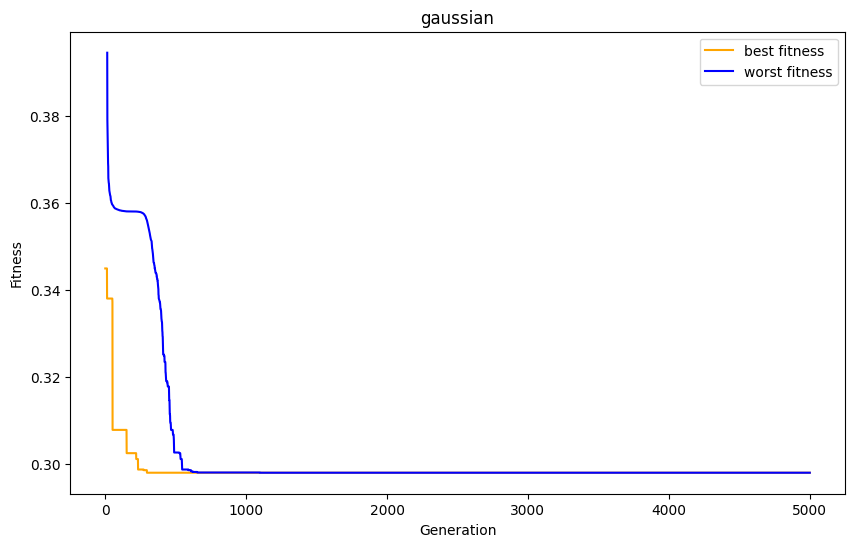

In [4]:
Genetic_AlgorithmGrandote = Genetic_Algorithm(
    n_genes=14, 
    n_alleles=7, 
    scale=100, 
    offset=0, 
    size_population=500,
    generations=5000, 
    pm=0.08, 
    show_output=True, 
    tournamentSize=20,
    parentsSize = 2,
    randomMutation = False
)
Genetic_AlgorithmGrandote.start()


generation: 100, best_Fitness: 1640.269598942986, worst_fitness: 6380.30981178005
generation: 200, best_Fitness: 867.6967905013578, worst_fitness: 3324.735910511602
generation: 300, best_Fitness: 667.1898642621861, worst_fitness: 2069.8172660405016
generation: 400, best_Fitness: 230.2323905226, worst_fitness: 1503.5602548267298
generation: 500, best_Fitness: 230.2323905226, worst_fitness: 1074.2136154976001
generation: 600, best_Fitness: 167.5161366442, worst_fitness: 835.6285872700859
generation: 700, best_Fitness: 136.47471405419998, worst_fitness: 683.3558766662
generation: 800, best_Fitness: 78.32694948, worst_fitness: 476.5915544078001
generation: 900, best_Fitness: 77.36896374, worst_fitness: 353.6667045136
generation: 1000, best_Fitness: 77.36896374, worst_fitness: 262.09233817378606
generation: 1100, best_Fitness: 52.09943405419999, worst_fitness: 198.43670147999998
generation: 1200, best_Fitness: 52.09943405419999, worst_fitness: 170.9221626284
generation: 1300, best_Fitness: 

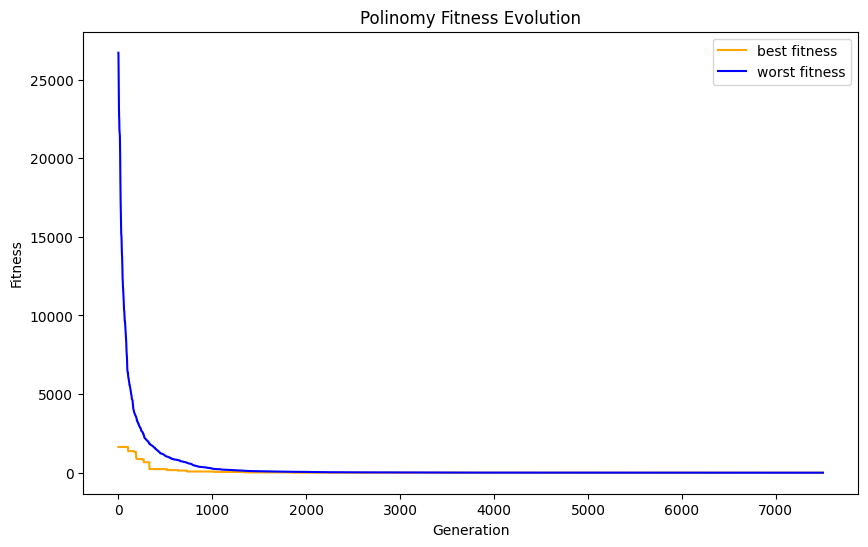

In [11]:

Genetic_AlgorithmPl = Genetic_Algorithm(
    n_genes=6, 
    n_alleles=7, 
    scale=10, 
    offset=0, #con esto elegimos el tamaño de los catetos
    size_population=100, 
    generations=7500, 
    pm=0.08, 
    show_output=True, 
    tournamentSize=2,
    parentsSize = 2,
    randomMutation=True
)
Genetic_AlgorithmPl.start()


In [6]:
'''
Genetic_AlgorithmPl = Genetic_Algorithm(
    n_genes=6, 
    n_alleles=10, 
    scale=10, 
    offset=0, #con esto elegimos el tamaño de los catetos
    size_population=100, 
    generations=15000, 
    pm=0.08, 
    show_output=True, 
    tournamentSize=2,
    parentsSize = 2,
    randomMutation=True
)
Genetic_AlgorithmPl.start()
'''

'\nGenetic_AlgorithmPl = Genetic_Algorithm(\n    n_genes=6, \n    n_alleles=10, \n    scale=10, \n    offset=0, #con esto elegimos el tamaño de los catetos\n    size_population=100, \n    generations=15000, \n    pm=0.08, \n    show_output=True, \n    tournamentSize=2,\n    parentsSize = 2,\n    randomMutation=True\n)\nGenetic_AlgorithmPl.start()\n'

generation: 100, best_Fitness: 0.07867608947239457, worst_fitness: 0.08159997414477393
generation: 200, best_Fitness: 0.0007480437638838211, worst_fitness: 0.00850560135443068
generation: 300, best_Fitness: 0.0007480437638838211, worst_fitness: 0.0007480437638838211
generation: 400, best_Fitness: 0.0007480437638838211, worst_fitness: 0.0007480437638838211
generation: 500, best_Fitness: 0.0007480437638838211, worst_fitness: 0.0007480437638838211
generation: 600, best_Fitness: 0.0007480437638838211, worst_fitness: 0.0007480437638838211
generation: 700, best_Fitness: 0.0007480437638838211, worst_fitness: 0.0007480437638838211
generation: 800, best_Fitness: 0.0007480437638838211, worst_fitness: 0.0007480437638838211
generation: 900, best_Fitness: 0.0007480437638838211, worst_fitness: 0.0007480437638838211
generation: 1000, best_Fitness: 0.0007480437638838211, worst_fitness: 0.0007480437638838211
entré en el de los triángulos
#########################################
Best fitness: 0.0007480

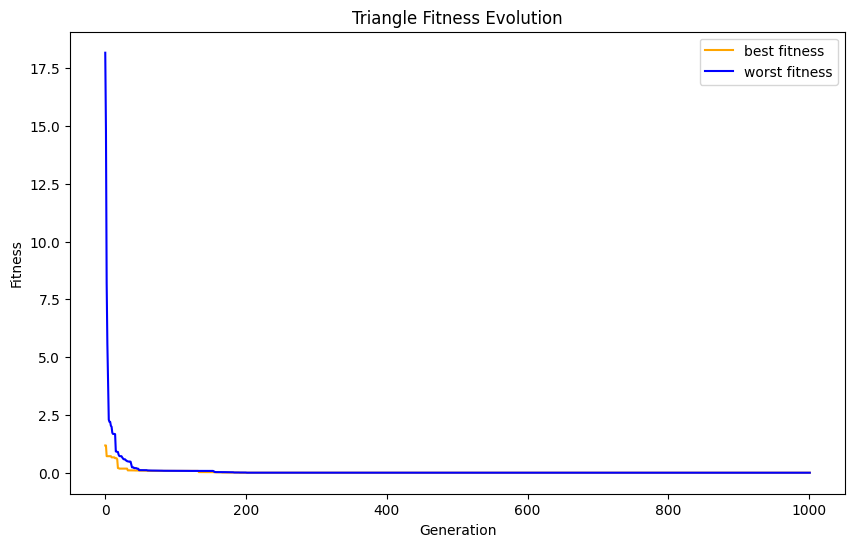

In [7]:

Genetic_AlgorithmTr = Genetic_Algorithm(
    n_genes=2, 
    n_alleles=13, 
    scale=1000, 
    offset=0, #con esto elegimos el tamaño de los catetos
    size_population=10,
    generations=1000, 
    pm=0.08, 
    show_output=True, 
    tournamentSize=3,
    parentsSize = 2,
    randomMutation = True,
)
Genetic_AlgorithmTr.start()



generation: 100, best_Fitness: 0.00030957884256926915, worst_fitness: 0.05525251441479584
generation: 200, best_Fitness: 0.00030957884256926915, worst_fitness: 0.008413933652863331
generation: 300, best_Fitness: 0.00030957884256926915, worst_fitness: 0.0012776193772728872
generation: 400, best_Fitness: 0.00030957884256926915, worst_fitness: 0.00030957884256926915
generation: 500, best_Fitness: 0.00030957884256926915, worst_fitness: 0.00030957884256926915
generation: 600, best_Fitness: 0.00030957884256926915, worst_fitness: 0.00030957884256926915
generation: 700, best_Fitness: 0.00030957884256926915, worst_fitness: 0.00030957884256926915
generation: 800, best_Fitness: 0.00030957884256926915, worst_fitness: 0.00030957884256926915
generation: 900, best_Fitness: 0.00030957884256926915, worst_fitness: 0.00030957884256926915
generation: 1000, best_Fitness: 0.00030957884256926915, worst_fitness: 0.00030957884256926915
entré al del seno
#########################################
Best fitness:0.

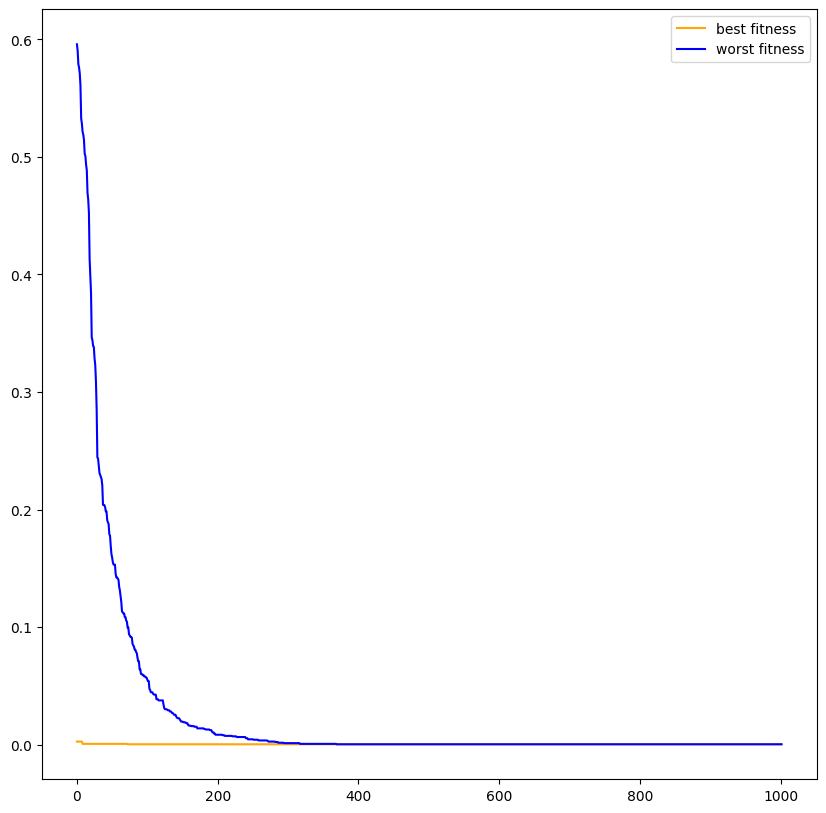

In [8]:
Genetic_Algorithm1 = Genetic_Algorithm(
    n_genes=1, 
    n_alleles=10, 
    scale=1000, 
    offset=0, 
    size_population=100, 
    generations=1000, 
    pm=0.08, 
    show_output=True, 
    tournamentSize=3,
    parentsSize = 2,
    randomMutation = True
)
Genetic_Algorithm1.start()


